$\textbf{Lab 5}$

Download the training datasets from one of the two pT-range folders. In each folder, there are 2 files, each containing 100k jets. The signal dataset is labeled as “higgs” and the background dataset is labeled as “qcd.”

From the Higgs Classification in the instructions, "Each sample contains 14 features: ‘pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'"

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

In [2]:
labels = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

higgs = open('higgs_100000_pt_1000_1200.pkl', 'rb')
higgs_file = pickle.load(higgs)
higgs_file

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1081.930827,-0.292886,-0.066601,128.449819,0.062010,0.000188,0.788336,0.000623,0.984561,0.132130,0.106621,0.134201,0.806947,0.223551
99996,1114.171856,-0.071148,-0.518420,128.133729,0.060090,0.000269,1.239701,0.000745,0.863711,0.297420,0.248208,0.344352,0.834536,0.224712
99997,1066.593095,0.776745,-2.067399,125.351507,0.063063,0.000260,1.036221,0.000161,1.545428,0.230121,0.177881,0.148904,0.772991,0.231622
99998,1043.746312,-0.403642,1.761954,125.477362,0.065217,0.000204,0.736390,0.000253,1.147794,0.208940,0.162744,0.182036,0.778902,0.222911


In [3]:
qcd = open('qcd_100000_pt_1000_1200.pkl', 'rb')
qcd_file = pickle.load(qcd)
qcd_file

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015
99996,1070.385446,-0.762397,-2.405166,143.872351,0.032136,0.000224,6.749812,0.002829,0.718651,0.293553,0.268076,0.408478,0.913209,0.261662
99997,1116.722590,-0.166511,-1.141038,118.185074,0.049617,0.000331,2.712970,0.002456,0.859900,0.642900,0.456476,0.747645,0.710027,0.147913
99998,1147.609045,0.405501,-1.125710,292.925318,0.129771,0.004310,1.972101,0.005786,0.930685,0.672938,0.361115,0.723057,0.536624,0.567817


$\textbf{Initial Writeup}$ 

For your lab report, create an initial writeup of your data and what you found. Think of this as a book report, where you describe how the data was taken, what the labels mean, and how to interpret the first plots you've made. This will need to be several pages long. 

First, we will examine what the different columns in our datasets represet. As referenced in the problem setup, "Each sample contains 14 features: ‘pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'." Below, will be a brief summary of what each variable represents, for reference.

- $P_{T}$, or 'pt' - This variable is used to represent the broad transverse momentum, i.e the amount of momentum perpendicular to the beam

- $\eta$, or 'eta' - The absolute value of this variable is useful, as it allows you to describe a pseudorapidity range. It is defined in terms of the polar angle $\theta$ as $\eta = -ln\tan(\frac{\theta}{2})$. It can also be thought of as a geometric quantity, a function of the polar angle $\theta$ that goes from $\infty$ to $-\infty$ as $\theta$ goes from $0$ to $\pi$. (As evidenced by our equation).

- $\phi$, or 'phi' - The x-axis points from the IP to the center of the LHC ring, and the y-axis points upwards. This variable is simply used to represent the azimulthal angle around the z-axis (The proton beams are moving along the z-axis).

Note: A typical way to define a jet is to draw a cone of size $R = \sqrt{(\Delta \eta)^2 + \Delta(\phi)^2)}$

- $M$, or 'mass' - The mass of a jet is given by the difference between the squared sums of the energy $E_i$ and the momenta $p_i$ of the cconstituents: $M^2 = \big(\sum_i E_i \big)^2 - \big(\sum_i p_i \big)^2$. Further, for a two-body decay the jet mass can be approximated as $M^2 \approx p_{T1}p_{T2}\Delta R_{12}^2$
    
- $e_2$, or 'ee2' - This variable is used to represent the 2-point energy correlation function for a jet J. An abbreviated form of its definition can be described by the function $e_2^{(\beta)}=\frac{E_{CF_2}(\beta)}{E_{CF_1}(\beta)^2}$, where $E_{CF_1}(\beta) = \sum_{i\in J}p_{T_i}, and E_{CF_2}(\beta)=\sum_{i<j\in J} p_{T_i}p_{T_j}(\Delta R_{ij})^{\beta}$

- $e_3$, or 'ee3' - This variable is used to represent the 3-point energy correlation function for a jet J. An abbreviated form of its definition is described by $e_3^{(\beta)}=\frac{E_{CF_3}(\beta)}{E_{CF_1}(\beta)^3}$, where $E_{CF_3}(\beta)=\sum_{i<j<k\in J}p_{T_i}p_{T_j}p_{T_k}(\Delta R_{ij} \Delta R_{ik} \Delta R_{jk})^{\beta}$

- $D_2$, or 'd2' - This variable represents the ratio between the 3 point energy correlation functions and the two point energy correlation function squared, i.e $D_2^{(\beta)} = \frac{e_{3}^{(\beta)}}{(e_2^{(\beta)})^2}$. This variable can be useful in identifying two-body structures within jets.

- 'angularity' - A class of jet shapes, or angularities, that can be used to describe the energy flow inside of a jet. A natural generalization of these jet shapes to single cone jets of large mass $m_J$ is $\tilde{\tau_a} = \frac{1}{m_J}\sum_{i\in \text{jet}}\omega_i sin^a(\frac{\pi \theta_i}{2R})[1-cos(\frac{\pi \theta_i}{2R})]^{1-a}$

- $\tau_1$, or 't1' - Represents the N-subjettiness for 1 candidate subjet. This can be used to quantify to what degree a given jet J is compatible with being composed of 1 or fewer subjets. It can be described mathematically using $\tau_1 (\beta) = \frac{1}{\tau_0(\beta)}\sum_{i\in J}p_{T_i}\Delta R_{a_1,i}^{\beta}$, where $\tau_0 (\beta) = \sum_{i\in J}p_{T_i}\Delta R^\beta$

- $\tau_2$, or 't2' - Represents the N-subjettiness for 2 candidate subjets, i.e quantifies to what degree a given jet J is compatible with being composed of 2 or fewer subjets. It is described as follows: $\tau_2 (\beta) = \frac{1}{\tau_0(\beta)}\sum_{i\in J}p_{T_i}\text{min}(\Delta R_{a_1,i}^{\beta}, \Delta R_{a_2, i}^{\beta})$

- $\tau_3$, or 't3' - Same as with $\tau_1$ and $\tau_2$, but for 3 or fewer subjets, and is defined by $\tau_3 (\beta) = \frac{1}{\tau_0(\beta)}\sum_{i\in J}p_{T_i}\text{min}(\Delta R_{a_1,i}^{\beta}, \Delta R_{a_2, i}^{\beta}, \Delta R_{a_3,i}^{\beta})$

- More generally, for some N subjettiness, $\tau_N (\beta) = \frac{1}{\tau_0(\beta)}\sum_{i\in J}p_{T_i}\text{min}(\Delta R_{a_1,i}^{\beta}, \Delta R_{a_2, i}^{\beta}, \text{...},\Delta R_{a_N,i}^{\beta})$

- $\tau_{21}$, or 't21' - Simply defined as the ratio between $\tau_2$ and $\tau_1$, $\frac{\tau_2}{\tau_1}$. This ratio can be used to generate the dimensionless variables that are useful in identifying two-body structures within jets.

- $\tau_{32}$, or 't32' - Same as above, but explicitly defined as $\frac{\tau_3}{\tau_{2}}$

- $k_{t}\Delta R$, or 'KtDeltaR' - Defined as the $\Delta R$ between two subjets. 

To establish context, we must first examine what a "jet" is. In one context, jets are the signatures of quarks and gluons that are generated in the high-energy collisions. As the lab material states, however, there is not necessarily a unique jet definition. A jet can simply be thought of as a group of particles that go towards the same direction in the detector, defined in terms of experimental observables like 4-momenta. As mentioned in our above definition, a cone of size $R = \sqrt{(\Delta \eta)^2 + \Delta(\phi)^2)}$ can be a simple way to group a region of particles into a jet.

The Large Hadron Collider (LHC) utilizes proton-proton interactions, and since we are using simulated LHC data, we can assume that our jets are products of 2 protons colliding at high energies. (This is also self-evident because the problem specifies we are utilizing our simulated data as an inclusive search for the standard model Higgs boson in pp collisions at $\sqrt{s}$ = 13 TeV). Such a collision generates heavy particles, which have correspondingly large transverse momentums (remember $p_T$ as defined in our variable descriptions above), that quickly decay and interact in various ways that enable a multitude of different jets. 

For the LHC in particular, some jets are reconstructed from remnant energy deposits in calorimeter clusters, whereas other jets are from particles that are directly identified by smaller sub-detectors in the LHC. These two main approaches are called Calorimeter jets, and particle flow jets respectively. Because these proton-proton collisions can result in a vast multitude of different particles and energies, many sub-detectors are utilized in the LHC to enable better grouping of different particle detections into distinct jets. Such groupings are described in our given data, with 14 columns and 100,000 entries for each column. Our 100,000 rows correspond to different jets, which we will simply take for granted here, as the specific means by which each detection is grouped into jets could constitute an entire paper on its own. Thankfully, our jets are more easily analyzed because of our 14 columns, which represent different variables that describe the different properties of the jets, as explained in the above definitions. Additionally, the 14 columns were selected because of their utility in characterizing the different jets, and the methodology behind that could also serve as it's own paper, so we will use them for our search but not delve into why they were chosen. Ultimately, our given data represents 100,000 jets, with 14 corresponding parameters (described above in our variable descriptions), that arise due to many different particle/energy detections within the LHC (simulated in our case) as a consequence of proton-proton high-energy collisions. 

The papers utilized for this portion of the lab are detailed below:

- Substructure of high-$p_T$ Jets at the LHC: https://arxiv.org/pdf/0807.0234.pdf

- Analytic Boosted Boson Discrimination: https://arxiv.org/pdf/1507.03018v5.pdf

- Identification of high transverse momentum top quarks in $pp$ collisions at $\sqrt{s} = 8$ TeV with the ATLAS detector: https://doi.org/10.1007/JHEP06(2016)093 

- Identifying Boosted Objects with N-subjettiness: https://arxiv.org/pdf/1011.2268.pdf

- Identification of boosted Higgs bosons decaying into b-quark pairs with the ATLAS detector at 13 TeV:https://doi.org/10.1140/epjc/s10052-019-7335-x

- Experimental aspects of jet physics at LHC:https://arxiv.org/pdf/1608.00057.pdf

- Jet Substructure at the Tevatron and LHC: New results, new tools, new benchmarks: https://arxiv.org/pdf/1201.0008.pdf

- TASI Lectures on Collider Physics: https://arxiv.org/pdf/1709.04533.pdf

Explore the training data by addressing following questions:

$\textbf{1.)}$ Do all features provide discrimination power between signal and background?

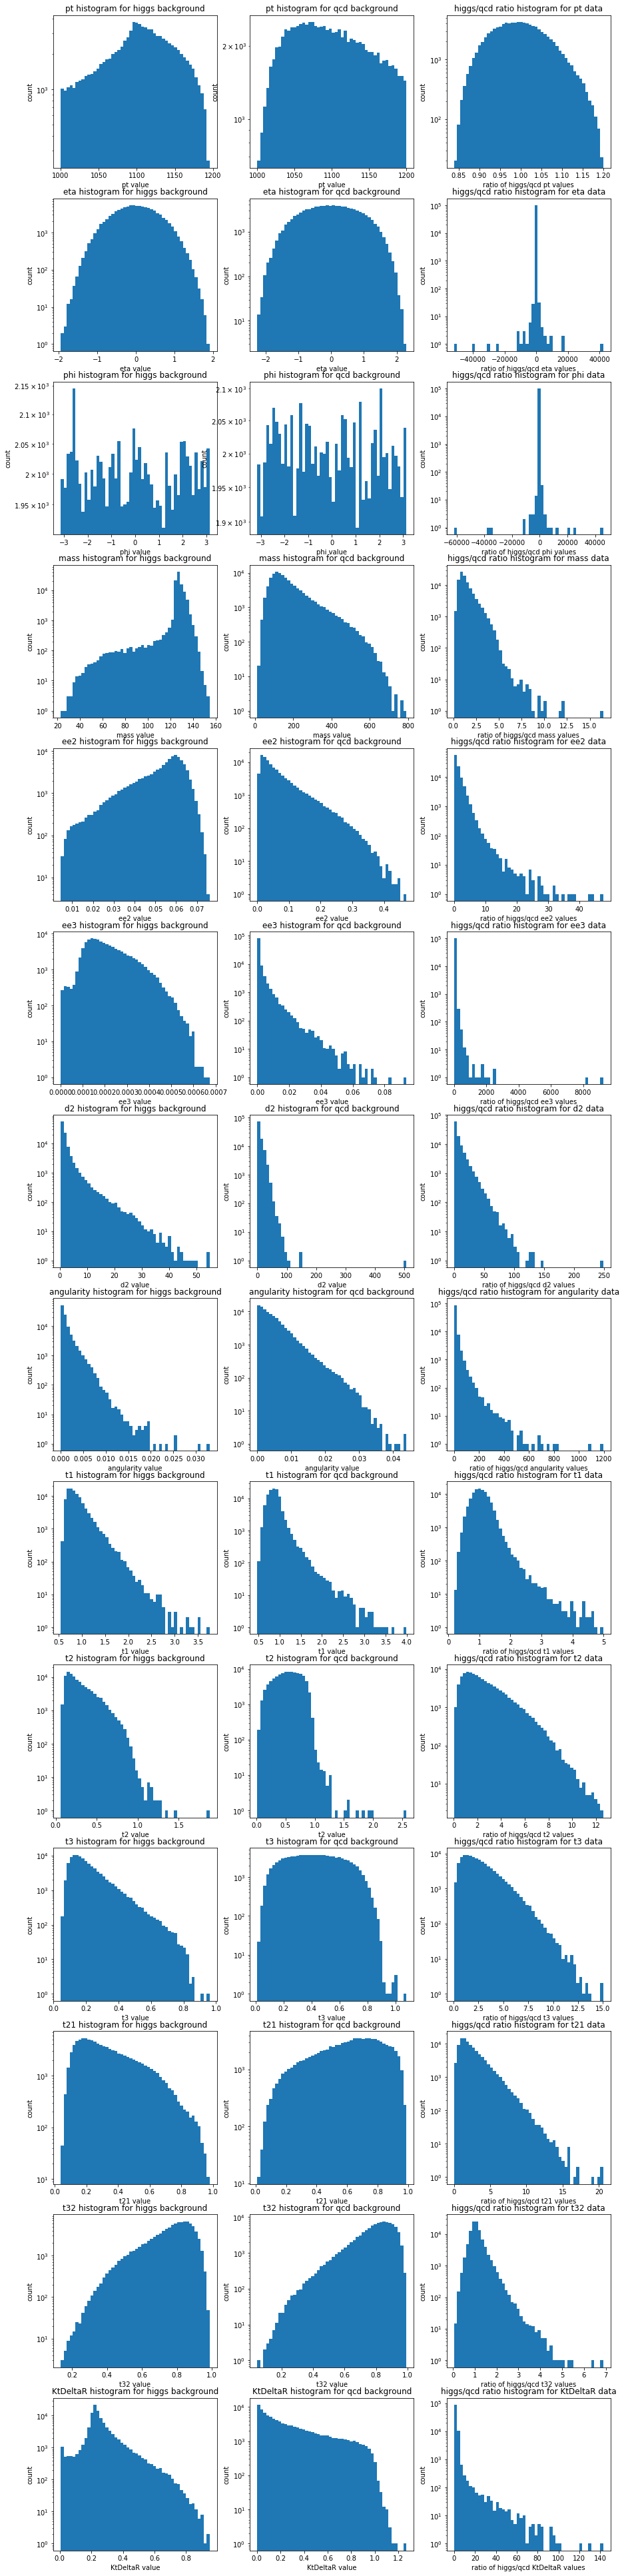

In [4]:
fig, ax = plt.subplots(14, 3, figsize = (5*3, 5*14))
higgs = []
qcd = []
higgs_qcd_ratio = []
for k in range(14):
    for j in range(1):
        for i in range(100000):
            higgs.append(higgs_file[labels[k]][i])
            qcd.append(qcd_file[labels[k]][i])
            higgs_qcd_ratio.append(qcd_file[labels[k]][i] / higgs_file[labels[k]][i])
        ax[k][j].hist(higgs, bins = 50)
        ax[k][j+1].hist(qcd, bins = 50)
        ax[k][j+2].hist(higgs_qcd_ratio, bins = 50)
        ax[k][j].set_yscale('log')
        ax[k][j+1].set_yscale('log')
        ax[k][j+2].set_yscale('log')
        ax[k][j].set_title(str(labels[k]) + " histogram for higgs background")
        ax[k][j+1].set_title(str(labels[k]) + " histogram for qcd background")
        ax[k][j+2].set_title("higgs/qcd ratio histogram for " + str(labels[k]) + " data")
        ax[k][j].set_xlabel(str(labels[k]) + " value")
        ax[k][j+1].set_xlabel(str(labels[k]) + " value")
        ax[k][j+2].set_xlabel("ratio of higgs/qcd " + str(labels[k]) + " values")
        ax[k][j].set_ylabel("count")
        ax[k][j+1].set_ylabel("count")
        ax[k][j+2].set_ylabel("count")

    higgs = []  
    qcd = []
    higgs_qcd_ratio = []


I couldn't quite figure out how to appropriately model the distinction between the signal and the background, but the 3rd figure for each variable shows an indicator towards whether or not each feature provides discrimination power between the signal and background. The shape of the ratio, as well as extreme values of the ratios should provide context towards whether the background is distinguishable or not, as we would typically expect an anomalous ratio to be a feature of some background. 

$\textbf{2.)}$ Are there correlations among these features?

To analyze this, I'll plot a correlation matrix for the QCD and Higgs backgrounds respectively. Recall that the relationship between the correlation coefficcient matrix, R, and the covariance matrix, C, is given by $R_{ij} = \frac{C_{ij}}{\sqrt{C_{ii}*C_{jj}}}$; if we examine N-dimensional samples, $X=[x_1, x_2, \text{...} x_N]^T$, then the covariance matrix element $C_{ij}$ is the covariance of $x_i$ and $x_j$, and the element $C_{ii}$ is the variance of $x_i$. In the plots below, we see some positive and negative correlation regions, with an expected correlation of 1 diagonaly (in the regions for each variable's correlation with itself). 

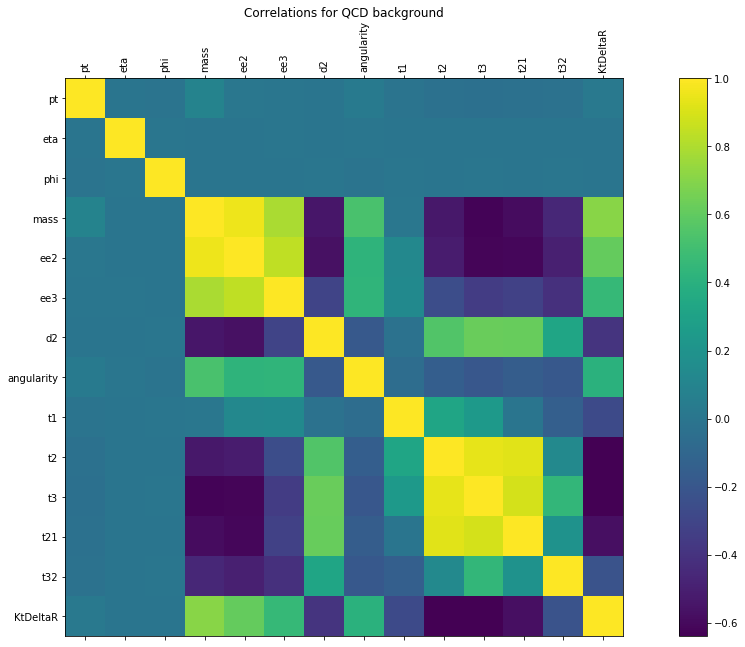

In [5]:
plt.figure(figsize=(20,10))
plt.matshow(qcd_file.corr(), fignum=1)
plt.xticks(range(len(qcd_file.columns)), qcd_file.columns, rotation="vertical")
plt.yticks(range(len(qcd_file.columns)), qcd_file.columns)
plt.colorbar()
plt.title("Correlations for QCD background", y=1.10)
plt.show()

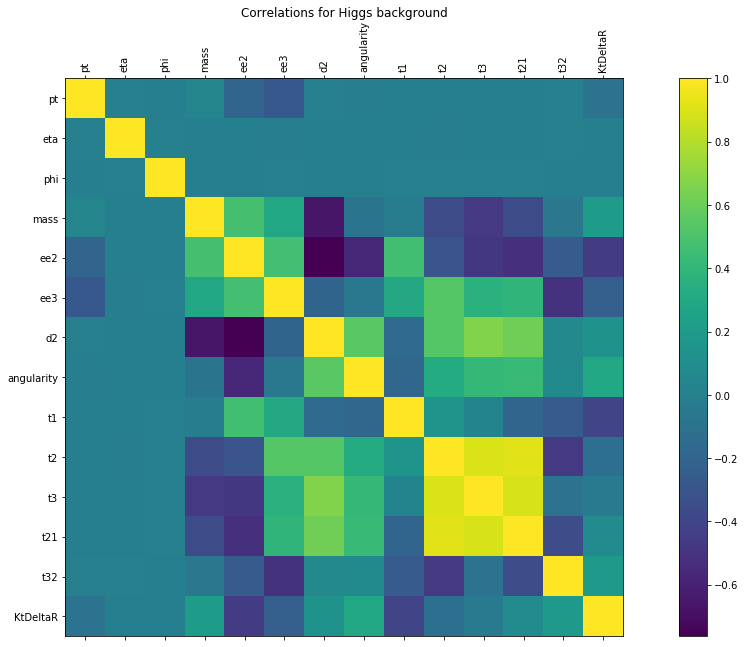

In [6]:
plt.figure(figsize=(20,10))
plt.matshow(higgs_file.corr(), fignum=1)
plt.xticks(range(len(higgs_file.columns)), higgs_file.columns, rotation="vertical")
plt.yticks(range(len(higgs_file.columns)), higgs_file.columns)
plt.colorbar()
plt.title("Correlations for Higgs background", y=1.10)
plt.show()

$\textbf{3.)}$ Compute expected discovery sensitivity by normalizing each sample appropriately.

As given in the Higgs_data_v2.html provided for this lab, for the high $p_T$ sample (1000-1200 range), the expected yields of $N_{higgs}$ and $N_{qcd}$ are 50 and 2000 respectively. Now, to approximate the probability of a detection we can look at the probability that we would find $N_{total} = N_{higgs} + N_{qcd}$ detections or more, with a background distribution with mean $N_{qcd}$. This should compare our counts to only the qcd background, thus giving a sufficient approximation for the probability of detection. As such, it can be calculated below to be:


In [10]:
n_higgs = 50
n_qcd = 2000
prob = 1 - stats.poisson.cdf(n_higgs + n_qcd, n_qcd)
print("The expected probability is " + str(prob))

The expected probability is 0.12961287455491943


$\textbf{4.)}$ Develop a plan to optimize the discovery sensitivity by applying selections to these features.

Haven't been able to come up with a great way to set up optimizing discovery sensitivity yet. In past labs, we tend to focus on 5-sigma detection thresholds, since they can constitute 'discoveries,' so I will want to set up a strategy to work around this threshold. Our correlation data can be potentially useful as well, as it helps us group parameters that can be used concurrently to optimize discovery sensitivity. Finding a group of variables that have low correlations, but are also fairly distinct between the higgs/qcd backgrounds should be helpful in optimizing discovery sensitivity, as it won't require as much filtering between the data, and should lower errors. So, I have a general idea of how I want to do it, but not many details code wise at the moment.